<a href="https://colab.research.google.com/github/LargeMan/CAP4630/blob/master/HW_2/Homework2_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook for solving linear regression using the batch/mini-batch/stochastic gradient descent

## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [266]:
# generate m random pairs (x1, x2, y)

m = 100
X = 2 * np.random.rand(m, 2)

y = [(4 + (3 * i[0]) + (7 * i[1]) + np.random.rand(1)) for i in X]

Y = np.concatenate(y)
y = np.array(y)
print(X.shape)
print(np.shape(Y))

(100, 2)
(100,)


Text(0.5, 0, 'y')

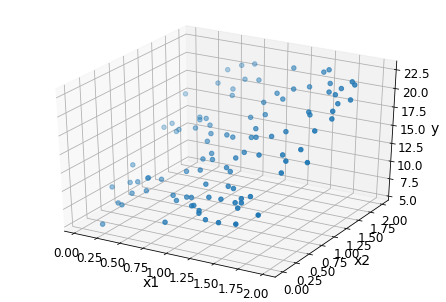

In [267]:
fig = plt.figure(1)
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')


In [268]:
print(X.shape)

(100, 2)


In [269]:
# show the first 5 rows
print(X[:5, :])

[[1.06448998 0.25148302]
 [0.26542931 0.28708472]
 [1.87963958 1.46579784]
 [0.32476379 0.37669817]
 [1.46165895 0.31232769]]


## Combine bias $b=w_0$ and weight $w_1$ and weight $w_2$

Linear regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [271]:
print(X_b.shape)

(100, 3)


In [272]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         1.06448998 0.25148302]
 [1.         0.26542931 0.28708472]
 [1.         1.87963958 1.46579784]
 [1.         0.32476379 0.37669817]
 [1.         1.46165895 0.31232769]]


In [0]:
# create array with x1=0 and x2=0, x1=0 and x2=2, x1=2 and x2=2
X_new = np.array([[0, 0], [2, 0], [0, 2], [2, 2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((4, 1)), X_new])

In [274]:
print(X_new_b)

[[1. 0. 0.]
 [1. 2. 0.]
 [1. 0. 2.]
 [1. 2. 2.]]


In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 

# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4
y_predict = X_new_b.dot(weight) 


weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)
        #y_predict = X_new_b.dot(weight)

#y_predict

In [277]:
weight_path_mgd[-1]

array([[4.49649691],
       [3.35237065],
       [6.56672943]])

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

Text(0.5, 0, 'y')

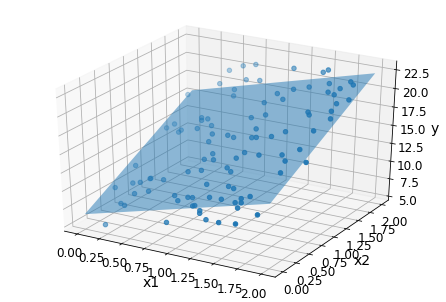

In [279]:
fig = plt.figure(1)
ax = Axes3D(fig)

(X1, X2) = np.meshgrid(np.array([0, 2]), np.array([0, 2]))
ax.scatter(X[:, 0], X[:, 1], y)


yhat = lambda x, y: (weight_path_mgd[-1][2] + (x * weight_path_mgd[-1][1]) +
                    (weight_path_mgd[-1][0] * y))
ax.plot_surface(X1, X2, yhat(X1, X2), alpha = 0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')